# Model - 2

## Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv("/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv")
df_original = df.copy()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## Cast the object data type into category data types

In [3]:
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title'] = df['Job Title'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


## Ensure numeric fields are numeric

In [4]:
df['Age'] = df['Age'].astype(float)
df['Years of Experience'] = df['Years of Experience'].astype(float)
df['Salary'] = df['Salary'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6702 non-null   float64 
 1   Gender               6702 non-null   category
 2   Education Level      6701 non-null   category
 3   Job Title            6702 non-null   category
 4   Years of Experience  6701 non-null   float64 
 5   Salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB


## Check for null values

In [5]:
# Check for missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
#If there are missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
df.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## Check for duplicated values

In [8]:
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows
# print(duplicate_rows)

Number of duplicate rows: 4911


In [9]:
# Remove duplicate rows (keeps first occurrence by default)
df = df.drop_duplicates()

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [10]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


## Standardize Text Values

In [11]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()

df.dtypes

Age                     float64
Gender                 category
Education Level        category
Job Title              category
Years of Experience     float64
Salary                  float64
dtype: object

## Summary of statistics

In [12]:
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (1787, 6)


## Check the outliers

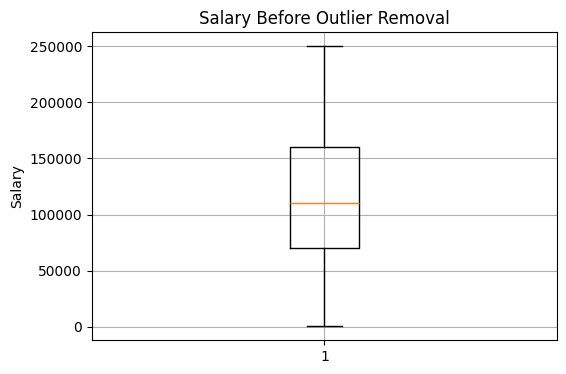

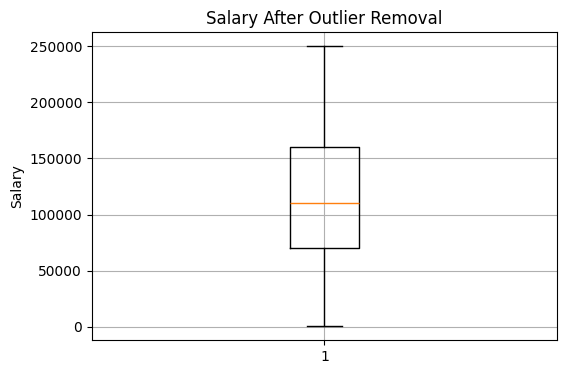

In [13]:
# Boxplot before outlier removal
plt.figure(figsize=(6, 4))
plt.boxplot(df["Salary"])
plt.title("Salary Before Outlier Removal")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

# Remove outliers using IQR method
q1, q3 = np.percentile(df["Salary"], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe
df = df[(df["Salary"] >= lower_bound) & (df["Salary"] <= upper_bound)]

# Boxplot after outlier removal
plt.figure(figsize=(6, 4))
plt.boxplot(df["Salary"])
plt.title("Salary After Outlier Removal")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


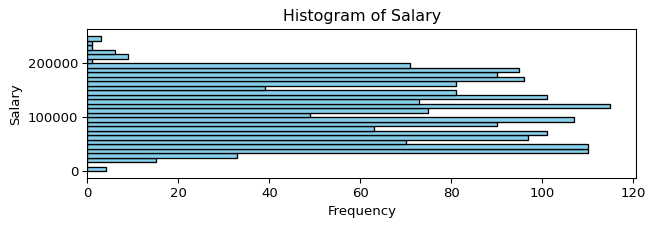

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numeric_cols = ["Salary"]

# Create one subplot per numeric column
fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2.5))

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_cols):
    # Check if axs is a single Axes object or an array of Axes objects
    if len(numeric_cols) == 1:
        current_ax = axs
    else:
        current_ax = axs[i]

    current_ax.hist(df[col], bins=30, color='skyblue', edgecolor='black', orientation='horizontal') # Set orientation='horizontal' for horizontal histograms
    current_ax.set_title(f"Histogram of {col}")
    current_ax.set_xlabel("Frequency") # Swap xlabel and ylabel for horizontal
    current_ax.set_ylabel(col) # Swap xlabel and ylabel for horizontal

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df['Salary']))
print("Kurtosis:", kurtosis(df['Salary']))

print("Original dataset size:", df_original.shape)
print("After removing outliers:", df.shape)
print(df.describe())


Skewness: 0.07777450160836472
Kurtosis: -1.1198718791314735
Original dataset size: (6704, 6)
After removing outliers: (1787, 6)
               Age  Years of Experience         Salary
count  1787.000000          1787.000000    1787.000000
mean     35.139899             9.156128  113184.659765
std       8.213045             6.844924   51596.536766
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000


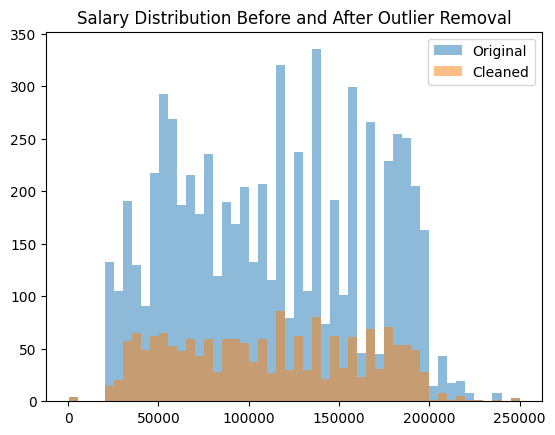

In [16]:
import matplotlib.pyplot as plt

plt.hist(df_original['Salary'], bins=50, alpha=0.5, label='Original')
plt.hist(df['Salary'], bins=50, alpha=0.5, label='Cleaned')
plt.legend()
plt.title("Salary Distribution Before and After Outlier Removal")
plt.show()

# Data Preprocessing

## Feature Engineering - One-Hot Encoding for nominal features

### Correlation

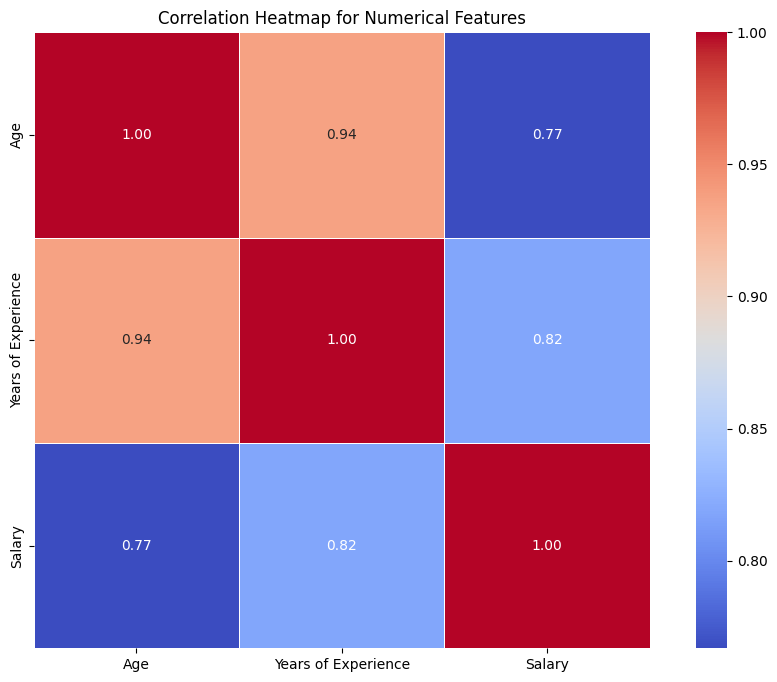

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation on all numeric columns (including encoded categorical)
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

In [18]:
correlation_with_target = df.corr(numeric_only=True)['Salary'].sort_values(ascending=False)
print(correlation_with_target)

Salary                 1.000000
Years of Experience    0.818725
Age                    0.766841
Name: Salary, dtype: float64


In [ ]:
# Start from original cleaned DataFrame
df_encoded = pd.get_dummies(df, drop_first=True)

# Drop rows with missing target or features (if any)
df_encoded.dropna(subset=['Salary'], inplace=True)

# Define features and target
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Sanity check
print("X shape:", X.shape)
print("y shape:", y.shape)

# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)


X shape: (1787, 202)
y shape: (1787,)


In [33]:
correlation_with_target = df.corr()['Salary'].sort_values(ascending=False)
print(correlation_with_target)

Salary                                 1.000000
Years of Experience                    0.818725
Age                                    0.766841
Education Level_PhD                    0.449930
Job Title_Software Engineer Manager    0.315202
                                         ...   
Job Title_Junior Sales Associate      -0.196527
Education Level_Bachelor's Degree     -0.275496
Education Level_High School           -0.336381
Job Title_Developer                         NaN
Job Title_Social M                          NaN
Name: Salary, Length: 203, dtype: float64


## Initialize and Train the XGBoost Model

In [34]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Model Evaluation

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


R² Score: 0.9107227020552734
Mean Salary: 113184.65976496923
Mean Absolute Error (MAE): 10015.54274366868
Root Mean Squared Error (RMSE): 15405.756586173808
Mean Squared Error (MSE): 237337335.99243766


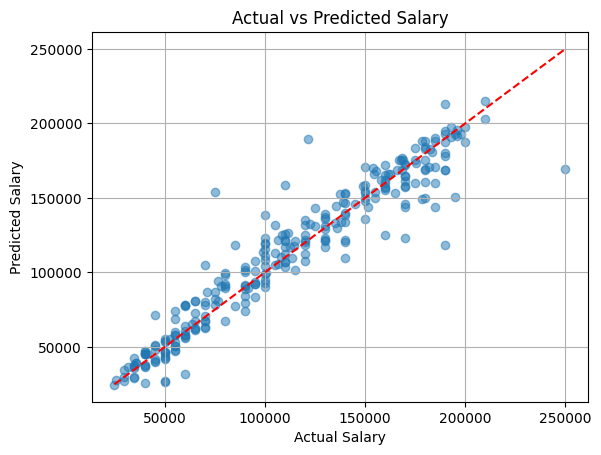

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


## Hyperparameter Tuning (Grid Search/CV)

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
}

grid = GridSearchCV(XGBRegressor(), params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


## Cross-Validation

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Average R² from 5-fold CV:", scores.mean())

Average R² from 5-fold CV: 0.6983023235865092


## Save the Model

In [40]:
import joblib
joblib.dump(best_model, 'model2.pkl')

['model2.pkl']